In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test multi-class classifier

In [2]:
test_otto = joblib.load('test_otto.pkl')

otto_data = test_otto['data']
otto_features = test_otto['features']
otto_target = test_otto['target']
otto_model = test_otto['rf_model']

#### (model: multi-class, feature_type: numeric)

In [ ]:
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', figsize=(12, 8))

In [ ]:
# show percentile
# modify returned axes
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', 
                   show_percentile=True, figsize=(15, 8))
_ = axes[0].se
_ = axes[2].set_ylabel('target_0 rate')

In [ ]:
# multiple targets
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_%d' %(i) for i in range(9)], 
                   show_percentile=True, figsize=(15, 8))

In [ ]:
# subset of targets
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                   target=['target_%d' %(i) for i in [2, 5, 8]], show_percentile=True, figsize=(15, 8))

In [ ]:
axes = target_plot(df=otto_data, feature='feat_32', feature_name='feat_32', target=['target_2', 'target_3', 'target_4'], 
                   num_grid_points=20, show_percentile=True, figsize=(15, 8))

In [ ]:
# percentile_range
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 8), show_percentile=True)

In [ ]:
# equal grid_type
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=10, grid_type='equal', figsize=(15, 8))

In [ ]:
# grid_range
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=11, grid_type='equal', grid_range=(0, 10),  figsize=(15, 8))

In [ ]:
# customized grid points
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   cust_grid_points=range(0, 100, 10), figsize=(15, 8))

In [ ]:
# provide the Axes to plot on
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style('whitegrid')
ax1 = sns.distplot(otto_data['feat_67'].values, color='#5BB573', ax=axes[0])
ax1.set_title('feat_67 distribution\n')
ax1.set_xlabel('feat_67')
ax2 = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', ax=axes[1])

In [ ]:
# use plot params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Class rate through different feat_67 values',
    'subtitle': 'Average class rate through different feat_67 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_color': '#3288bd',
    'bar_color': 'lightblue',
    'line_width': 1,
    'xticks_rotation': 90
}
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                   target=['target_2', 'target_5', 'target_8'], plot_params=plot_params, figsize=(15, 8))

# test target plot interact

In [3]:
from pdpbox.info_plots import target_plot_interact

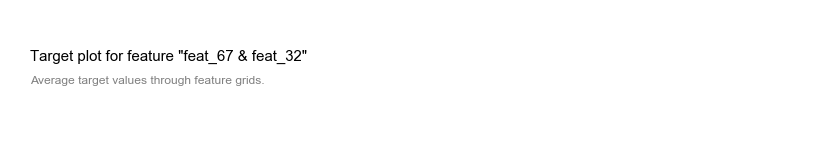

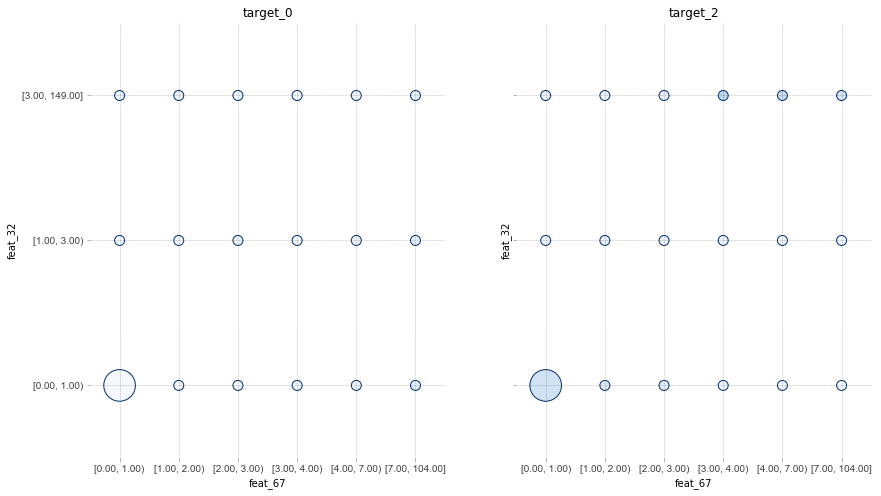

In [8]:
axes = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                            target=['target_0', 'target_2'], figsize=(14, 8))

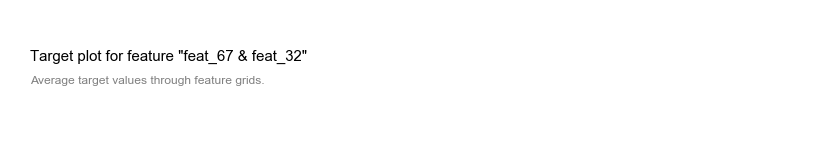

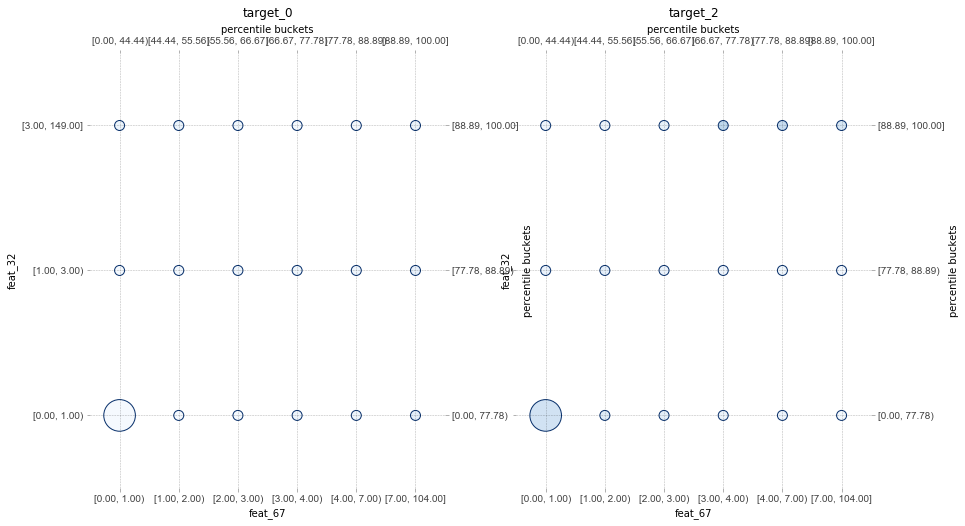

In [7]:
axes = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                            target=['target_0', 'target_2'], show_percentile=True, figsize=(14, 8))